# Demo: Newton's Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# this makes sure the images don't come out looking muddy on 
# retina displays (which your computer probably uses)
%matplotlib inline
%config InlineBackend.figure_format='retina'

In this demo, we study an important application of linear approximation, called **Newton's method**. Newton's method is an iterative algorithm for solving nonlinear equations of the form 
$$
f(x) = 0
$$
where $f(x)$ is a differentiable function. The basic motivation behind Newton's method has already been discussed in the October 11 lecture. 

First, we show how Newton's method gives a fast, accurate approximation of the irrational number $\sqrt{2}$. Remember that Newton's method is equivalent to Heron's method here! 

In [2]:
def newton_solve_sqrt(x0=1.,A=2.):
    xold = x0 # initial guess
    xnew = 1e5 # just set new guess to be something big to get iteration going
    dist = np.abs(xnew-xold) # when this is sufficiently small, stop the iteration
    
    while dist >= 1e-5: 
        
        xnew = 0.5*(xold + A/xold) # update guess
                
        dist = np.abs(xnew-xold) # check how close successive guesses are
        
        xold = xnew # get ready for next stage of the iteration
        
    return xnew 

We can compute a standard "nearly exact" approximation of $\sqrt{2}$ using the NumPy $\texttt{sqrt}$ function, and compare this benchmark value to the Newton approximation. 

In [15]:
start=time.time()
exact = np.sqrt(2)
end=time.time()

exact_rt = end-start

start=time.time()
newton_approx = newton_solve_sqrt()
end=time.time()

newton_approx_rt = end-start

print('Error =' , np.abs(newton_approx-exact))
print('Runtime to Compute NumPy Approximation = ', exact_rt, 's')
print('Runtime to Compute Newton Approximation = ', newton_approx_rt, 's')


Error = 1.5947243525715749e-12
Runtime to Compute NumPy Approximation =  9.608268737792969e-05 s
Runtime to Compute Newton Approximation =  5.4836273193359375e-05 s


We see that Newton's method gives us *twelve digits of accuracy* , and is also faster than the benchmark NumPy square root function. So, Newton's method is no joke!

We can also use Newton's method to find the roots of more complicated equations. For instance, consider finding the roots of 
$$
f(x) = \cos(x) - x =0 . 
$$
This is equivalent to finding the intersection point between the grapgs of $y=\cos x$ and $y=x$: 

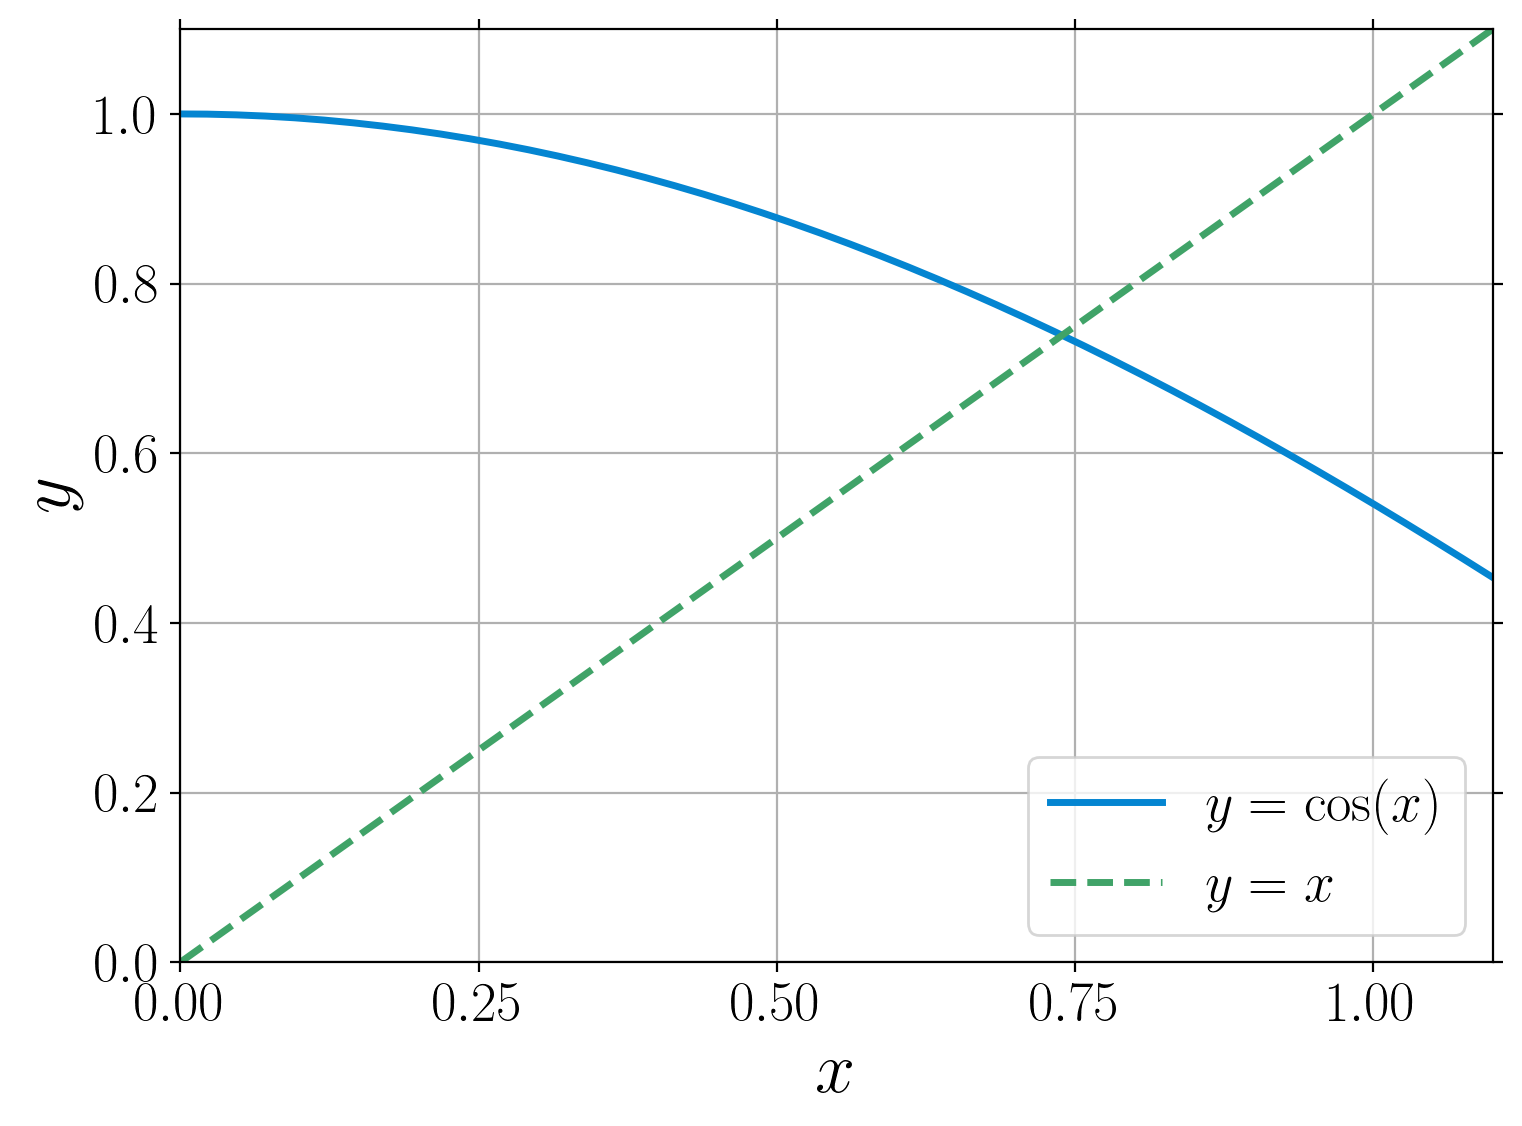

In [16]:
fig, ax =plt.subplots()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
x = np.linspace(-0.1,1.1)
plt.plot(x, np.cos(x), color='xkcd:cerulean', linestyle='-', label='$y=\cos(x)$', linewidth=2.5)
plt.plot(x,x, color='xkcd:greenish', linestyle='--', label='$y=x$', linewidth=2.5)

ax.grid()
# the rest of this is just plot labelling, don't worry about it 
plt.xlabel(r"$x$", fontsize=26, color = 'k')
plt.ylabel(r"$y$", fontsize=26, color='k')

plt.tick_params(axis='x', which='both', top='off', color = 'k')
plt.xticks(fontsize=20, rotation=0, color = 'k')
plt.tick_params(axis='y', which='both', right='off', color = 'k')
plt.yticks(fontsize=20, rotation=0, color = 'k')
ax.locator_params(axis='y', nbins=6)
ax.locator_params(axis='x', nbins=5)

plt.xlim([0.,1.1])
plt.ylim([0.,1.1])

ax.legend(fontsize=20)

plt.tight_layout()

fig.set_size_inches(8, 6)  

From this picture, we expect that the intersection point should be around $x\approx 0.75$. This helps us make our initial guess $x_0$! 

The Newton iterates for this problem are constructed according to 
$$
x_{n+1} =  x_n - \frac{f(x_n)}{f'(x_n)} = x_{n} - \frac{\cos(x_n)-x_n}{-\sin(x_n)-1}. 
$$
To keep our iteration loop decluttered, it's useful to define $f$ and $f'$ as Python functions. 

In [5]:
def f(x):
    return np.cos(x)-x

def fprime(x):
    return -(np.sin(x)+1.)

Coding the Newton loop is nothing scary: 

In [6]:
def newton_solve(x0=.75):
    xold = x0
    xnew = 1e5 # just something big to get the iteration going
    dist = np.abs(xnew-xold) # stop iteration when this is small
    
    while dist >= 1e-12: # tolerance is really tiny here, but Newton is so good it works!
        
        xnew = xold - f(xold)/fprime(xold)
                
        dist = np.abs(xnew-xold)
        
        xold = xnew
        
    return xnew 

Running our iterations, we get

In [7]:
approx_root = newton_solve()
print(approx_root)

0.7390851332151607


which is reasonable in light of our picture. We can check the approximation quality by plugging our guess back into $f(x)$: 

In [14]:
f(approx_root)

0.0

So, to machine accuracy (computers can only keep finitely many digits!!!), we have found the root to $f(x)$. 